In [1]:
import torch
torch.cuda.is_available()

True

In [2]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2 

# Load model

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\vhema/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-6-25 Python-3.10.14 torch-2.3.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [4]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# Make Detections

In [5]:
#img = 'https://ultralytics.com/images/zidane.jpg'
img = 'https://media.cntraveler.com/photos/53e2f41cdddaa35c30f66775/master/pass/highway-traffic.jpg'

In [6]:
results = model(img)
results.print()

image 1/1: 768x1024 14 persons, 34 cars, 1 motorcycle, 1 truck
Speed: 913.0ms pre-process, 268.2ms inference, 255.5ms NMS per image at shape (1, 3, 480, 640)


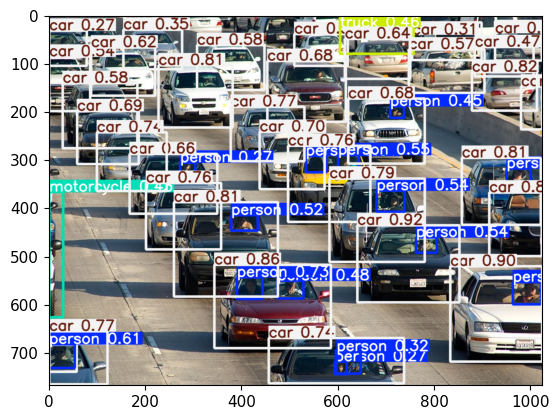

In [7]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [8]:
results.render()

[array([[[ 60,  70,  79],
         [ 56,  66,  75],
         [ 53,  63,  72],
         ...,
         [ 53,  66,  75],
         [ 55,  63,  74],
         [ 56,  65,  74]],
 
        [[ 58,  68,  77],
         [ 54,  64,  73],
         [ 50,  60,  69],
         ...,
         [ 53,  65,  77],
         [ 53,  63,  73],
         [ 52,  62,  71]],
 
        [[ 56,  66,  76],
         [ 53,  63,  73],
         [ 49,  59,  68],
         ...,
         [ 52,  64,  76],
         [ 50,  63,  72],
         [ 47,  60,  69]],
 
        ...,
 
        [[243, 243, 243],
         [243, 243, 243],
         [243, 243, 243],
         ...,
         [161, 145, 129],
         [157, 144, 127],
         [156, 143, 126]],
 
        [[243, 243, 243],
         [243, 243, 243],
         [243, 243, 243],
         ...,
         [157, 141, 125],
         [158, 142, 126],
         [160, 144, 128]],
 
        [[243, 243, 243],
         [243, 243, 243],
         [243, 243, 243],
         ...,
         [151, 135, 119],
  

# Real time detection

In [9]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# Train from scratch

In [10]:
import uuid   # Unique identifier
import os
import time

In [11]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 20

In [5]:
import cv2
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [7]:
cap.release()
cv2.destroyAllWindows()

In [12]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...


In [13]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [14]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
fatal: cannot change to 'C:\Users\vhema\Documents\data': No such file or directory
YOLOv5  2024-6-25 Python-3.10.14 torch-2.3.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0

# Loading custorm model

In [16]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\vhema/.cache\torch\hub\master.zip
YOLOv5  2024-6-25 Python-3.10.14 torch-2.3.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [17]:
img = os.path.join('data', 'images', 'awake.b0edfd8f-3235-11ef-9a01-f426793769ae.jpg')

In [18]:
results = model(img)

In [19]:
results.print()

image 1/1: 480x640 1 awake
Speed: 11.0ms pre-process, 42.9ms inference, 27.0ms NMS per image at shape (1, 3, 480, 640)


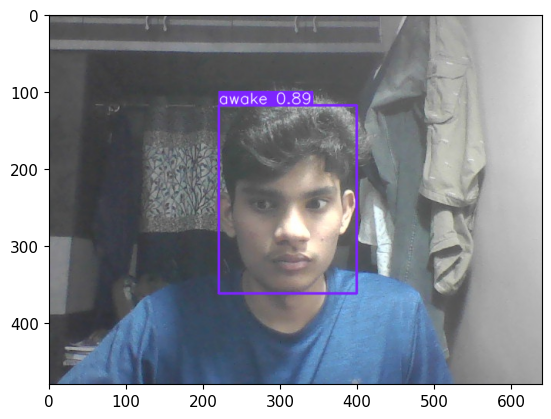

In [20]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [21]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()